## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 58.8ms	remaining: 58.7s
1:	learn: 0.9606716	total: 59.7ms	remaining: 29.8s
2:	learn: 0.9390920	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9209237	total: 61.9ms	remaining: 15.4s
4:	learn: 0.9046978	total: 62.9ms	remaining: 12.5s
5:	learn: 0.8896854	total: 63.9ms	remaining: 10.6s
6:	learn: 0.8724151	total: 64.8ms	remaining: 9.19s
7:	learn: 0.8558633	total: 65.6ms	remaining: 8.14s
8:	learn: 0.8400199	total: 66.5ms	remaining: 7.32s
9:	learn: 0.8229065	total: 67.3ms	remaining: 6.66s
10:	learn: 0.8057776	total: 68.1ms	remaining: 6.12s
11:	learn: 0.7907426	total: 68.9ms	remaining: 5.67s
12:	learn: 0.7753485	total: 69.6ms	remaining: 5.29s
13:	learn: 0.7601130	total: 70.4ms	remaining: 4.96s
14:	learn: 0.7475256	total: 71.3ms	remaining: 4.68s
15:	learn: 0.7326054	total: 72.1ms	remaining: 4.43s
16:	learn: 0.7206853	total: 72.8ms	remaining: 4.21s
17:	learn: 0.7077303	total: 73.8ms	remaining: 4.03s
18:	learn: 0.6955287	total: 74.6ms	remaining

101:	learn: 0.3059717	total: 149ms	remaining: 1.31s
102:	learn: 0.3044976	total: 150ms	remaining: 1.31s
103:	learn: 0.3030824	total: 151ms	remaining: 1.3s
104:	learn: 0.3013455	total: 152ms	remaining: 1.29s
105:	learn: 0.2996238	total: 152ms	remaining: 1.29s
106:	learn: 0.2980370	total: 153ms	remaining: 1.28s
107:	learn: 0.2965967	total: 154ms	remaining: 1.27s
108:	learn: 0.2951864	total: 155ms	remaining: 1.26s
109:	learn: 0.2942861	total: 155ms	remaining: 1.26s
110:	learn: 0.2932928	total: 156ms	remaining: 1.25s
111:	learn: 0.2916150	total: 157ms	remaining: 1.24s
112:	learn: 0.2903158	total: 158ms	remaining: 1.24s
113:	learn: 0.2893044	total: 159ms	remaining: 1.23s
114:	learn: 0.2880453	total: 160ms	remaining: 1.23s
115:	learn: 0.2868924	total: 161ms	remaining: 1.22s
116:	learn: 0.2854905	total: 162ms	remaining: 1.22s
117:	learn: 0.2838426	total: 163ms	remaining: 1.22s
118:	learn: 0.2827228	total: 164ms	remaining: 1.21s
119:	learn: 0.2820207	total: 164ms	remaining: 1.21s
120:	learn: 0

147:	learn: 0.2550767	total: 192ms	remaining: 1.1s
148:	learn: 0.2541599	total: 193ms	remaining: 1.1s
149:	learn: 0.2534840	total: 194ms	remaining: 1.1s
150:	learn: 0.2527124	total: 195ms	remaining: 1.09s
151:	learn: 0.2520669	total: 195ms	remaining: 1.09s
152:	learn: 0.2511829	total: 196ms	remaining: 1.09s
153:	learn: 0.2507161	total: 197ms	remaining: 1.08s
154:	learn: 0.2497802	total: 198ms	remaining: 1.08s
155:	learn: 0.2490613	total: 199ms	remaining: 1.08s
156:	learn: 0.2484356	total: 200ms	remaining: 1.07s
157:	learn: 0.2475208	total: 201ms	remaining: 1.07s
158:	learn: 0.2467460	total: 202ms	remaining: 1.07s
159:	learn: 0.2461317	total: 203ms	remaining: 1.06s
160:	learn: 0.2456028	total: 204ms	remaining: 1.06s
161:	learn: 0.2449256	total: 204ms	remaining: 1.06s
162:	learn: 0.2444113	total: 205ms	remaining: 1.05s
163:	learn: 0.2438126	total: 206ms	remaining: 1.05s
164:	learn: 0.2432080	total: 207ms	remaining: 1.05s
165:	learn: 0.2425986	total: 208ms	remaining: 1.04s
166:	learn: 0.2

314:	learn: 0.1723778	total: 340ms	remaining: 740ms
315:	learn: 0.1720145	total: 341ms	remaining: 738ms
316:	learn: 0.1715627	total: 342ms	remaining: 737ms
317:	learn: 0.1714053	total: 343ms	remaining: 735ms
318:	learn: 0.1709797	total: 344ms	remaining: 733ms
319:	learn: 0.1706233	total: 344ms	remaining: 732ms
320:	learn: 0.1703284	total: 345ms	remaining: 730ms
321:	learn: 0.1700544	total: 346ms	remaining: 729ms
322:	learn: 0.1696955	total: 347ms	remaining: 727ms
323:	learn: 0.1695203	total: 348ms	remaining: 726ms
324:	learn: 0.1693707	total: 349ms	remaining: 724ms
325:	learn: 0.1690932	total: 350ms	remaining: 723ms
326:	learn: 0.1687871	total: 351ms	remaining: 722ms
327:	learn: 0.1684932	total: 352ms	remaining: 720ms
328:	learn: 0.1680740	total: 353ms	remaining: 719ms
329:	learn: 0.1676495	total: 353ms	remaining: 717ms
330:	learn: 0.1672606	total: 354ms	remaining: 716ms
331:	learn: 0.1669891	total: 355ms	remaining: 714ms
332:	learn: 0.1666284	total: 356ms	remaining: 713ms
333:	learn: 

361:	learn: 0.1587473	total: 382ms	remaining: 674ms
362:	learn: 0.1585815	total: 383ms	remaining: 673ms
363:	learn: 0.1583085	total: 384ms	remaining: 671ms
364:	learn: 0.1579830	total: 385ms	remaining: 670ms
365:	learn: 0.1576744	total: 386ms	remaining: 668ms
366:	learn: 0.1574980	total: 387ms	remaining: 667ms
367:	learn: 0.1573862	total: 387ms	remaining: 665ms
368:	learn: 0.1572274	total: 388ms	remaining: 664ms
369:	learn: 0.1568606	total: 389ms	remaining: 662ms
370:	learn: 0.1564609	total: 390ms	remaining: 661ms
371:	learn: 0.1560608	total: 391ms	remaining: 660ms
372:	learn: 0.1558547	total: 392ms	remaining: 658ms
373:	learn: 0.1555605	total: 392ms	remaining: 657ms
374:	learn: 0.1552292	total: 393ms	remaining: 656ms
375:	learn: 0.1549435	total: 394ms	remaining: 654ms
376:	learn: 0.1546544	total: 395ms	remaining: 653ms
377:	learn: 0.1543066	total: 396ms	remaining: 652ms
378:	learn: 0.1540311	total: 397ms	remaining: 650ms
379:	learn: 0.1536233	total: 398ms	remaining: 649ms
380:	learn: 

513:	learn: 0.1257801	total: 514ms	remaining: 486ms
514:	learn: 0.1254765	total: 515ms	remaining: 485ms
515:	learn: 0.1254352	total: 516ms	remaining: 484ms
516:	learn: 0.1252340	total: 517ms	remaining: 483ms
517:	learn: 0.1252031	total: 517ms	remaining: 481ms
518:	learn: 0.1250256	total: 518ms	remaining: 480ms
519:	learn: 0.1247722	total: 519ms	remaining: 479ms
520:	learn: 0.1245918	total: 520ms	remaining: 478ms
521:	learn: 0.1243609	total: 521ms	remaining: 477ms
522:	learn: 0.1243283	total: 522ms	remaining: 476ms
523:	learn: 0.1241885	total: 522ms	remaining: 474ms
524:	learn: 0.1240465	total: 523ms	remaining: 473ms
525:	learn: 0.1238986	total: 524ms	remaining: 472ms
526:	learn: 0.1237245	total: 525ms	remaining: 471ms
527:	learn: 0.1236307	total: 526ms	remaining: 470ms
528:	learn: 0.1233258	total: 527ms	remaining: 469ms
529:	learn: 0.1232458	total: 528ms	remaining: 468ms
530:	learn: 0.1230684	total: 528ms	remaining: 467ms
531:	learn: 0.1229753	total: 529ms	remaining: 466ms
532:	learn: 

563:	learn: 0.1172948	total: 557ms	remaining: 430ms
564:	learn: 0.1171456	total: 558ms	remaining: 429ms
565:	learn: 0.1170940	total: 559ms	remaining: 428ms
566:	learn: 0.1169048	total: 559ms	remaining: 427ms
567:	learn: 0.1167425	total: 560ms	remaining: 426ms
568:	learn: 0.1166102	total: 561ms	remaining: 425ms
569:	learn: 0.1164306	total: 562ms	remaining: 424ms
570:	learn: 0.1162908	total: 563ms	remaining: 423ms
571:	learn: 0.1161027	total: 563ms	remaining: 422ms
572:	learn: 0.1159918	total: 564ms	remaining: 420ms
573:	learn: 0.1157478	total: 565ms	remaining: 419ms
574:	learn: 0.1155859	total: 566ms	remaining: 418ms
575:	learn: 0.1154385	total: 567ms	remaining: 417ms
576:	learn: 0.1153858	total: 568ms	remaining: 416ms
577:	learn: 0.1153157	total: 568ms	remaining: 415ms
578:	learn: 0.1150992	total: 569ms	remaining: 414ms
579:	learn: 0.1147799	total: 570ms	remaining: 413ms
580:	learn: 0.1146177	total: 571ms	remaining: 411ms
581:	learn: 0.1144786	total: 571ms	remaining: 410ms
582:	learn: 

736:	learn: 0.0929764	total: 705ms	remaining: 251ms
737:	learn: 0.0928240	total: 705ms	remaining: 250ms
738:	learn: 0.0927183	total: 707ms	remaining: 250ms
739:	learn: 0.0925957	total: 708ms	remaining: 249ms
740:	learn: 0.0925025	total: 708ms	remaining: 248ms
741:	learn: 0.0923401	total: 709ms	remaining: 247ms
742:	learn: 0.0923163	total: 710ms	remaining: 246ms
743:	learn: 0.0921469	total: 711ms	remaining: 245ms
744:	learn: 0.0920264	total: 712ms	remaining: 244ms
745:	learn: 0.0918709	total: 712ms	remaining: 243ms
746:	learn: 0.0917286	total: 713ms	remaining: 242ms
747:	learn: 0.0916813	total: 714ms	remaining: 241ms
748:	learn: 0.0915730	total: 715ms	remaining: 240ms
749:	learn: 0.0915436	total: 716ms	remaining: 239ms
750:	learn: 0.0914450	total: 716ms	remaining: 238ms
751:	learn: 0.0912826	total: 717ms	remaining: 237ms
752:	learn: 0.0911103	total: 718ms	remaining: 235ms
753:	learn: 0.0909450	total: 719ms	remaining: 234ms
754:	learn: 0.0908138	total: 720ms	remaining: 234ms
755:	learn: 

786:	learn: 0.0870605	total: 747ms	remaining: 202ms
787:	learn: 0.0869480	total: 748ms	remaining: 201ms
788:	learn: 0.0868796	total: 749ms	remaining: 200ms
789:	learn: 0.0867424	total: 750ms	remaining: 199ms
790:	learn: 0.0866955	total: 751ms	remaining: 198ms
791:	learn: 0.0865584	total: 752ms	remaining: 198ms
792:	learn: 0.0864905	total: 753ms	remaining: 197ms
793:	learn: 0.0863819	total: 754ms	remaining: 196ms
794:	learn: 0.0863573	total: 755ms	remaining: 195ms
795:	learn: 0.0862351	total: 756ms	remaining: 194ms
796:	learn: 0.0861251	total: 756ms	remaining: 193ms
797:	learn: 0.0860579	total: 758ms	remaining: 192ms
798:	learn: 0.0860072	total: 758ms	remaining: 191ms
799:	learn: 0.0859006	total: 759ms	remaining: 190ms
800:	learn: 0.0858199	total: 760ms	remaining: 189ms
801:	learn: 0.0856808	total: 761ms	remaining: 188ms
802:	learn: 0.0855259	total: 762ms	remaining: 187ms
803:	learn: 0.0854329	total: 763ms	remaining: 186ms
804:	learn: 0.0853917	total: 763ms	remaining: 185ms
805:	learn: 

957:	learn: 0.0717643	total: 895ms	remaining: 39.2ms
958:	learn: 0.0716632	total: 896ms	remaining: 38.3ms
959:	learn: 0.0716285	total: 897ms	remaining: 37.4ms
960:	learn: 0.0716086	total: 898ms	remaining: 36.4ms
961:	learn: 0.0715439	total: 899ms	remaining: 35.5ms
962:	learn: 0.0714557	total: 900ms	remaining: 34.6ms
963:	learn: 0.0713766	total: 901ms	remaining: 33.6ms
964:	learn: 0.0713120	total: 901ms	remaining: 32.7ms
965:	learn: 0.0712524	total: 902ms	remaining: 31.7ms
966:	learn: 0.0711092	total: 903ms	remaining: 30.8ms
967:	learn: 0.0710991	total: 904ms	remaining: 29.9ms
968:	learn: 0.0709569	total: 905ms	remaining: 28.9ms
969:	learn: 0.0708275	total: 906ms	remaining: 28ms
970:	learn: 0.0707121	total: 906ms	remaining: 27.1ms
971:	learn: 0.0706513	total: 907ms	remaining: 26.1ms
972:	learn: 0.0705804	total: 908ms	remaining: 25.2ms
973:	learn: 0.0705152	total: 909ms	remaining: 24.3ms
974:	learn: 0.0704742	total: 910ms	remaining: 23.3ms
975:	learn: 0.0704049	total: 911ms	remaining: 22

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.37537486439531037


#### Sanity Checks 

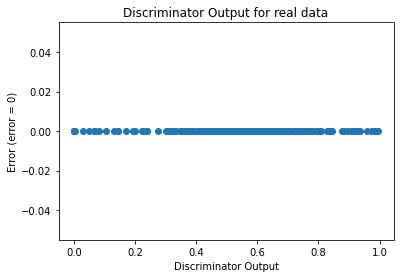

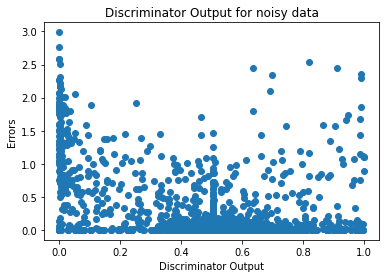

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 5000


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.4432355141775005


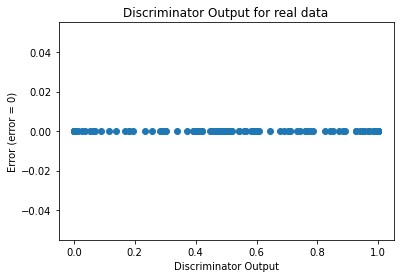

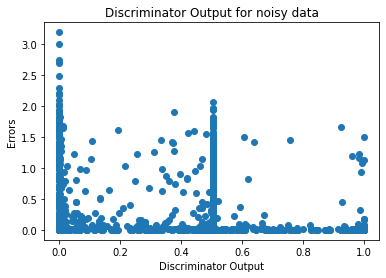

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.5895091486787766


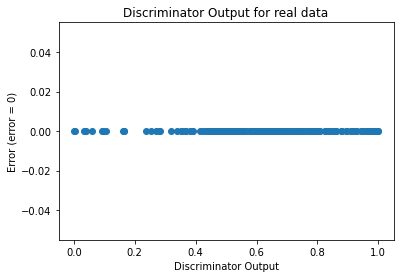

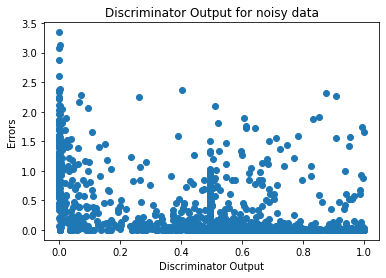

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8862]], requires_grad=True)
